In [1]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ruta =  '../imgpack/Monobanda/2_Corsica.jpg' # Consideramos que la imagen es monobanda
img = cv.imread(ruta,cv.IMREAD_GRAYSCALE) #Transformamos nuestra imagen a escala de grises

In [10]:
# Función filtro
def filtro(img, cf):
    #rows, colums
    r,c = img.shape
    imgcopy = img.copy()
    resimg = np.zeros((r,c), dtype=int)
    posocho = [(-1,-1),(-1,0),(-1,+1),(0,-1),(0,0),(0,+1),(+1,-1),(+1,0),(+1,+1)] # Vecinos que puede tener un pixel en 8-adyacencia
    for x in range(1,r-1):
        for y in range(1,c-1): # Eliminamos los bordes del bucle
            pximg = np.array([imgcopy[x+i,y+j] for i,j in posocho]) # Matriz 3x3 de la seccion de la imagen
            resimg[x,y] = round(np.sum(cf.flatten()*pximg) / np.sum(cf)) # Modificamos el pixel siguiendo la fórmula
    return resimg

#Kernels

media = np.array([
        [1,1,1],
        [1,1,1],
        [1,1,1]
    ]) # Media

mediaimg = np.array([
        [1,1,1],
        [1,2,1],
        [1,1,1]
    ]) # Media + img

gaussiano = np.array([
        [1,2,1],
        [2,4,2],
        [1,2,1]
    ]) # Gaussiano

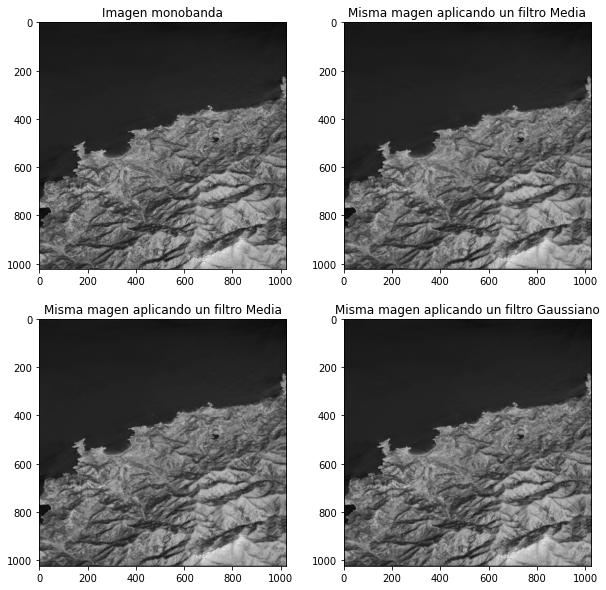

In [11]:
img_exp1 = filtro(img,media)
img_exp2 = filtro(img,mediaimg)
img_exp3 = filtro(img,gaussiano)
fig = plt.figure(figsize=(10, 10)) # Creamos nueva figura

fig.add_subplot(221)
plt.title('Imagen monobanda')
plt.imshow(img,cmap='gray')
fig.add_subplot(222)
plt.title('Misma magen aplicando un filtro Media')
plt.imshow(img_exp1,cmap='gray')
fig.add_subplot(223)
plt.title('Misma magen aplicando un filtro Media')
plt.imshow(img_exp2,cmap='gray')
fig.add_subplot(224)
plt.title('Misma magen aplicando un filtro Gaussiano')
plt.imshow(img_exp3,cmap='gray')
plt.show()